In [4]:
import pandas as pd 
    
# making dataframe 
df = pd.read_csv("/Users/khyathireddy/Downloads/data/scaled_data.csv") 
   
# output the dataframe
df = df.drop(columns='Unnamed: 0')
df = df.drop(columns='miss_distance')
# classifying dataset 
x=df.drop(columns='hazardous')
y=df.hazardous
df

,est_diameter_min,est_diameter_max,s_relative_velocity,absolute_magnitude,hazardous,est_diameter_avg
0,1.198271,2.679415,0.100504,16.73,0,1.938843
1,0.265800,0.594347,0.564248,20.00,1,0.430073
2,0.722030,1.614507,0.878488,17.83,0,1.168268
3,0.096506,0.215794,0.187003,22.20,0,0.156150
4,0.255009,0.570217,0.325876,20.09,1,0.412613
...,...,...,...,...,...,...
39995,0.096506,0.215794,0.239221,22.20,0,0.156150
39996,0.088015,0.196807,0.260909,22.40,0,0.142411
39997,0.006991,0.015633,0.305800,27.90,0,0.011312
39998,0.049723,0.111183,0.288658,23.64,0,0.080453


In [5]:
# Splitting the dataset using library into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((32000, 5), (32000,), (8000, 5), (8000,))

In [6]:
# checking evaluation scores before modelling

from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
def evaluation(y_test,y_pred):
    
    print('Accuracy:',accuracy_score(y_test,y_pred))
    print('f1_score:',f1_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('Classification report:\n',classification_report(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion matrix for the given prediction')
    plt.show()
    


In [7]:
# scaling both train and test datasets
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

s_x_train=pd.DataFrame(st.fit_transform(x_train),columns=x_train.columns)
s_x_test=pd.DataFrame(st.transform(x_test),columns=x_test.columns)

In [8]:
# Performing KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier()
classifier.fit(s_x_train, y_train)
y_pred = classifier.predict(s_x_test)


Accuracy: 0.87025
f1_score: 0.30800000000000005
Precision: 0.4031413612565445
Recall: 0.24919093851132687
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      7073
           1       0.40      0.25      0.31       927

    accuracy                           0.87      8000
   macro avg       0.65      0.60      0.62      8000
weighted avg       0.85      0.87      0.86      8000



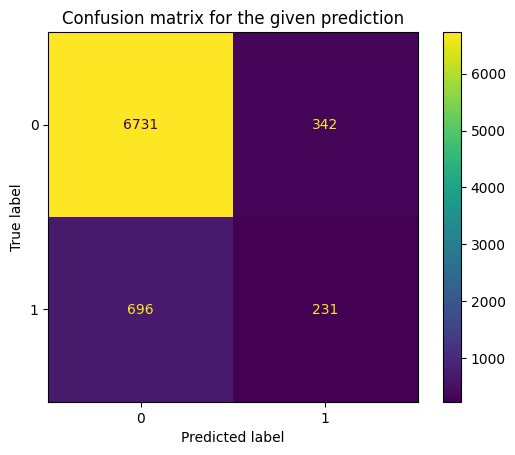

In [9]:
evaluation(y_test,y_pred)

Maximum accuracy:- 0.884875 at K = 33
Accuracy: 0.884875
f1_score: 0.11357074109720885
Precision: 0.5267857142857143
Recall: 0.06364617044228695
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      7073
           1       0.53      0.06      0.11       927

    accuracy                           0.88      8000
   macro avg       0.71      0.53      0.53      8000
weighted avg       0.85      0.88      0.84      8000



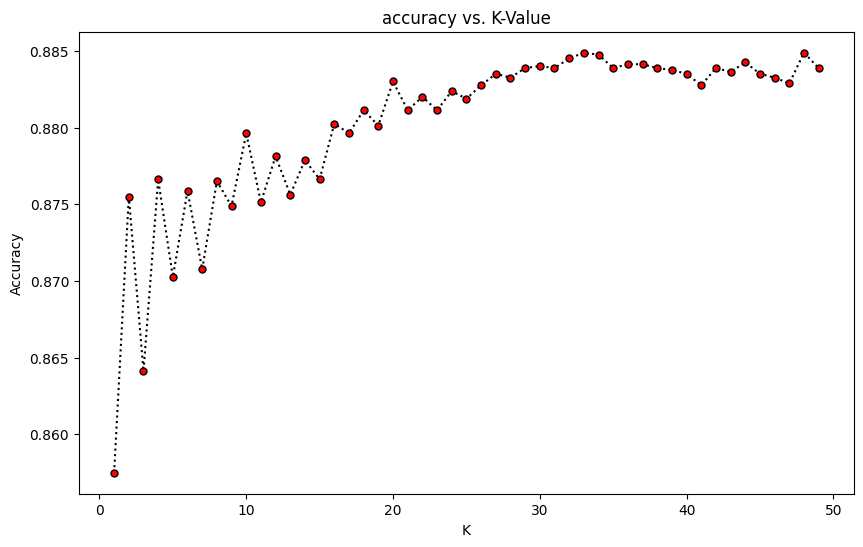

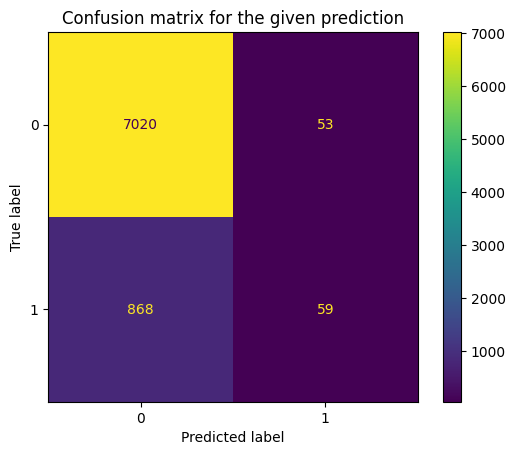

In [10]:
# CHecking for best K value 
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,50):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(s_x_train,y_train)
    yhat = KNN.predict(s_x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'black',linestyle='dotted', 
         marker='o',markerfacecolor='red', markersize=5)
plt.title('accuracy vs. K-Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
k = acc.index(max(acc))+1
print("Maximum accuracy:-",max(acc),"at K =",k)

classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(s_x_train, y_train)
y_pred = classifier.predict(s_x_test)

evaluation(y_test,y_pred)


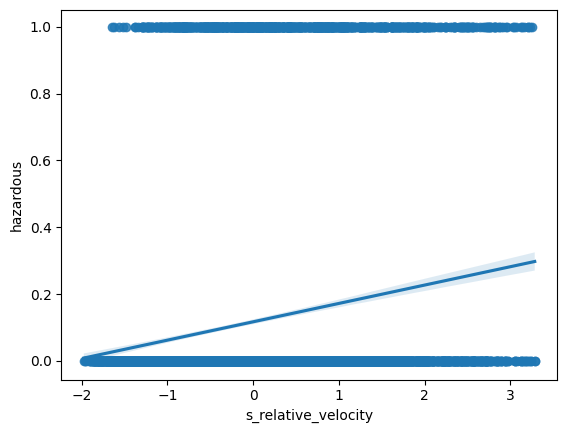

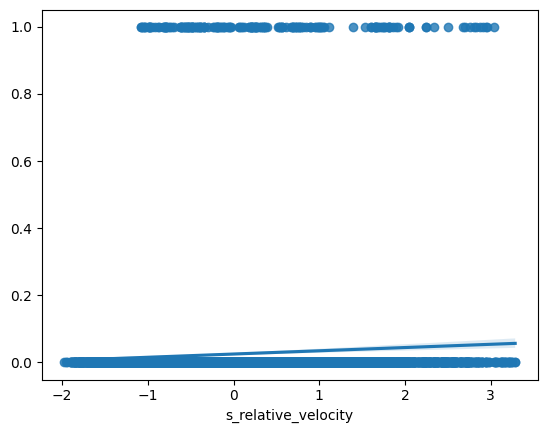

In [33]:
# Graphs on both actual and predicted values
import seaborn as sns
  
# draw regplot
sns.regplot(x = s_x_test['s_relative_velocity'],
            y=y_test,
            dropna = True)
plt.show()
# show the
sns.regplot(x = s_x_test['s_relative_velocity'],
            y=y_pred,
            dropna = True)
# show the plot
plt.show()

# sns.regplot(x=s_x_test['est_diameter_min'], y=y_test, logistic=True)

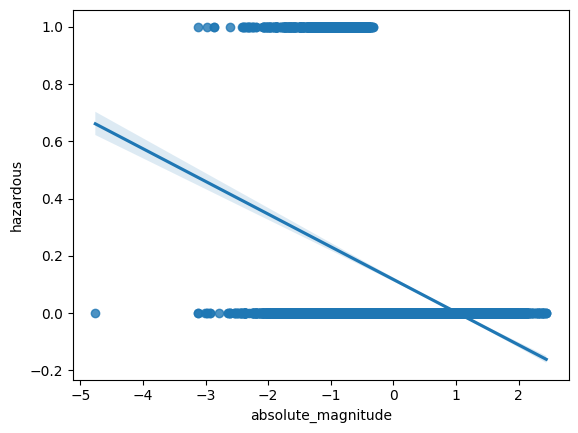

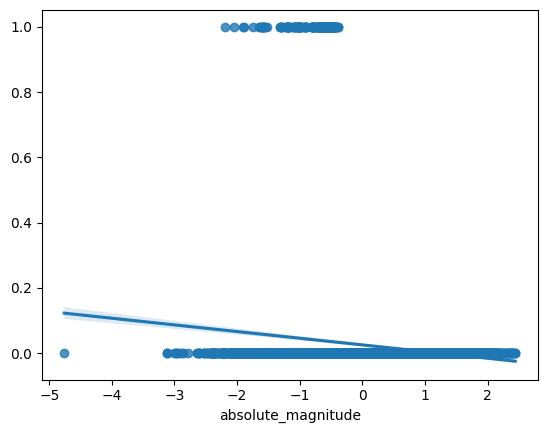

In [38]:
# draw regplot
sns.regplot(x = s_x_test['absolute_magnitude'],
            y=y_test,
            dropna = True)
# show the plot
plt.show()
sns.regplot(x = s_x_test['absolute_magnitude'],
            y=y_pred,
            dropna = True)
# show the plot
plt.show()

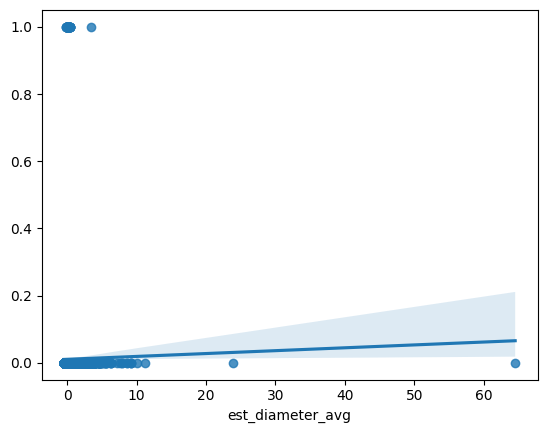

In [124]:
# draw regplot
sns.regplot(x = s_x_test['est_diameter_avg'],
            y=y_test,
            dropna = True)
# show the plot
plt.show()

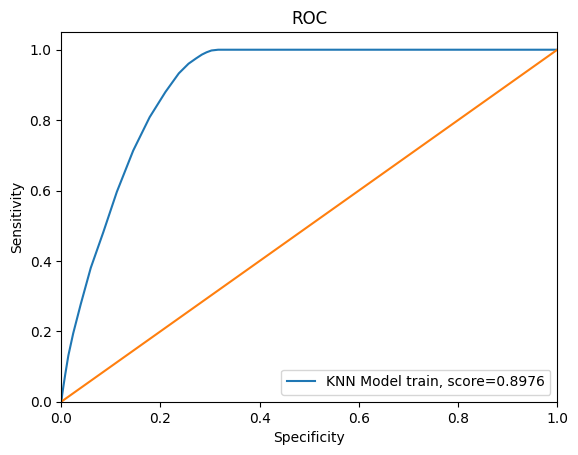

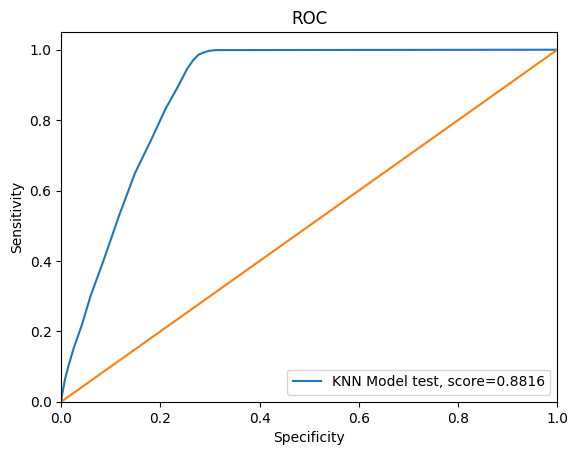

In [17]:
# visualization using ROC method

from sklearn.metrics import roc_curve, roc_auc_score


# Model_roc_auc = roc_auc_score(y_test, y_pred)
# fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(s_x_test)[:,1])

Ypred_train = classifier.predict_proba(s_x_train)[:,1]
fpr_train, tpr_train, threshold_train = roc_curve(y_train,  Ypred_train)

#plt.figure()
plt.plot(fpr_train,tpr_train,label="KNN Model train, score="+str(round(roc_auc_score(y_train, Ypred_train), 4)))
plt.plot([0, 1], [0, 1])
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Ypred_test = classifier.predict_proba(s_x_test)[:,1]
fpr_test, tpr_test, threshold_test = roc_curve(y_test,  Ypred_test)

#plt.figure()
plt.plot(fpr_test,tpr_test,label="KNN Model test, score="+str(round(roc_auc_score(y_test, Ypred_test), 4)))
plt.plot([0, 1], [0, 1])
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.876125
f1_score: 0.46228974498100917
Precision: 0.4650655021834061
Recall: 0.459546925566343
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7073
           1       0.47      0.46      0.46       927

    accuracy                           0.88      8000
   macro avg       0.70      0.70      0.70      8000
weighted avg       0.88      0.88      0.88      8000



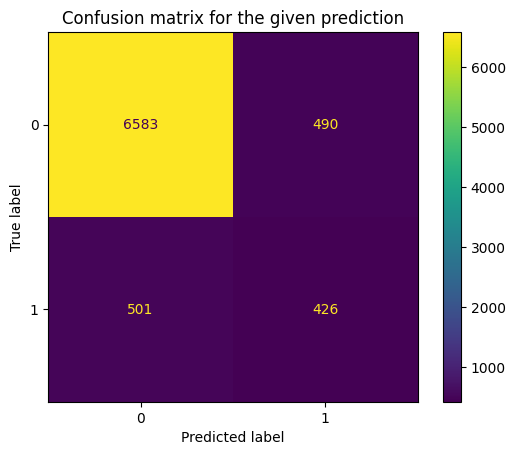

In [55]:
# Random forest model on dataset

from sklearn.ensemble import RandomForestClassifier
ModelRF = RandomForestClassifier(n_estimators = 100)
ModelRF.fit(x_train,y_train)
RF_Pred = ModelRF.predict(x_test)
evaluation(y_test,RF_Pred)


Accuracy: 0.8765
f1_score: 0.4630434782608695
Precision: 0.4665936473165389
Recall: 0.459546925566343
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7073
           1       0.47      0.46      0.46       927

    accuracy                           0.88      8000
   macro avg       0.70      0.70      0.70      8000
weighted avg       0.88      0.88      0.88      8000



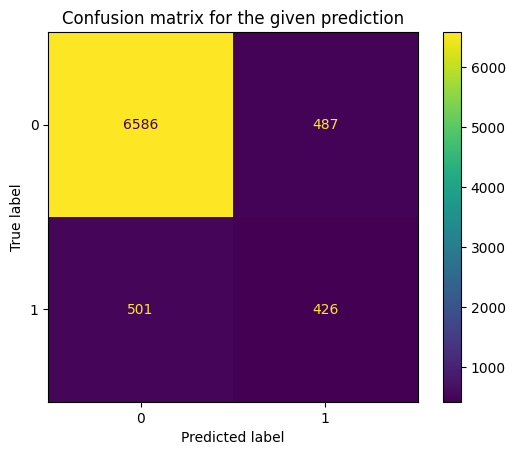

In [57]:
# Optimizing random forest classifier using Entropy criterion
from sklearn.ensemble import RandomForestClassifier
ModelRFEntropy = RandomForestClassifier(criterion='entropy', n_estimators = 100)
ModelRFEntropy.fit(x_train,y_train)
RFEntropy_Pred = ModelRFEntropy.predict(x_test)
evaluation(y_test,RFEntropy_Pred)

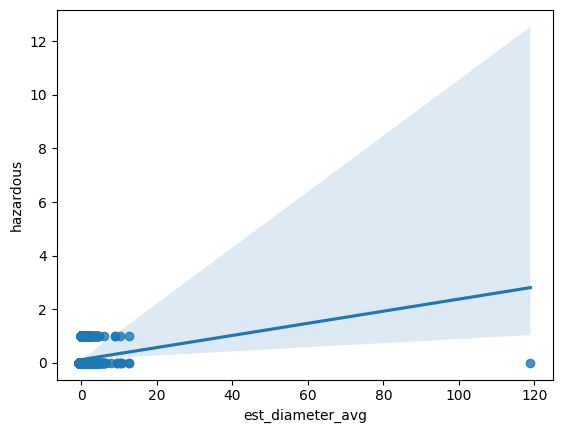

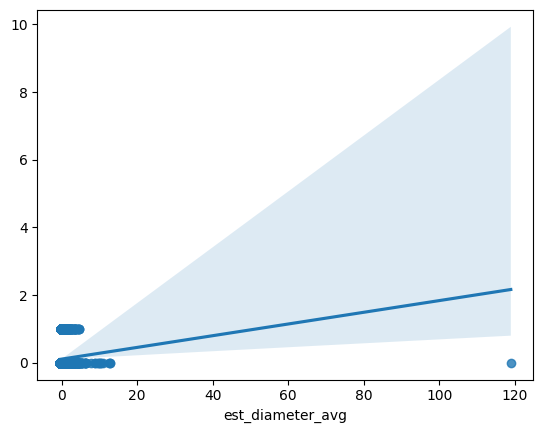

In [40]:
# draw regplot
sns.regplot(x = s_x_test['est_diameter_avg'],
            y=y_test,
            dropna = True)
# show the plot
plt.show()
sns.regplot(x = s_x_test['est_diameter_avg'],
            y=RF_Pred,
            dropna = True)
# show the plot
plt.show()

In [ ]:
# draw regplot
sns.regplot(x = s_x_test['s_relative_velocity'],
            y=y_test,
            dropna = True)
# show the plot
plt.show()
sns.regplot(x = s_x_test['s_relative_velocity'],
            y=RF_Pred,
            dropna = True)
# show the plot
plt.show()

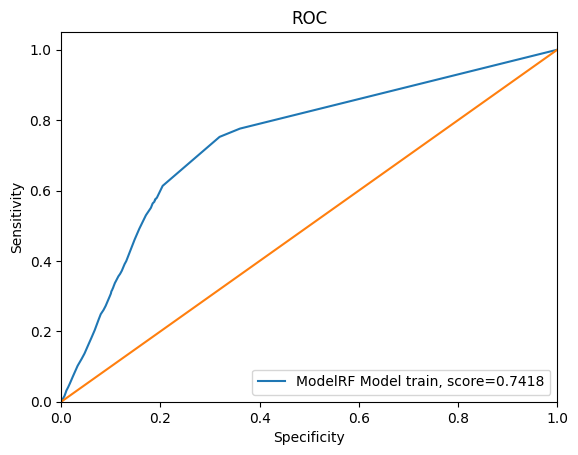

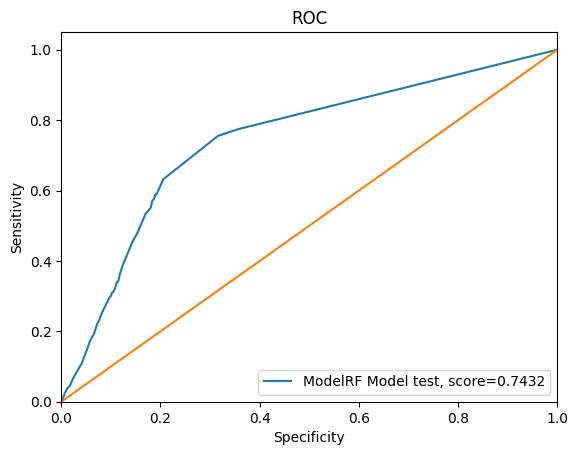

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score


# Model_roc_auc = roc_auc_score(y_test, y_pred)
# fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(s_x_test)[:,1])

Ypred_train = ModelRF.predict_proba(s_x_train)[:,1]
fpr_train, tpr_train, threshold_train = roc_curve(y_train,  Ypred_train)

#plt.figure()
plt.plot(fpr_train,tpr_train,label="ModelRF Model train, score="+str(round(roc_auc_score(y_train, Ypred_train), 4)))
plt.plot([0, 1], [0, 1])
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Ypred_test = ModelRF.predict_proba(s_x_test)[:,1]
fpr_test, tpr_test, threshold_test = roc_curve(y_test,  Ypred_test)

#plt.figure()
plt.plot(fpr_test,tpr_test,label="ModelRF Model test, score="+str(round(roc_auc_score(y_test, Ypred_test), 4)))
plt.plot([0, 1], [0, 1])
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


89.01
Accuracy: 0.890125
f1_score: 0.24027657735522903
Precision: 0.6043478260869565
Recall: 0.1499460625674218
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7073
           1       0.60      0.15      0.24       927

    accuracy                           0.89      8000
   macro avg       0.75      0.57      0.59      8000
weighted avg       0.86      0.89      0.86      8000



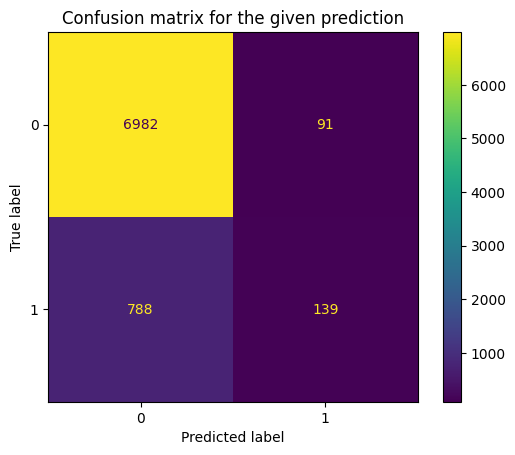

In [25]:
# XGBoost classifier on dataset
from xgboost import XGBClassifier
XGBC = XGBClassifier()
XGBC.fit(s_x_train, y_train)
XGBC_pred = XGBC.predict(s_x_test)
Acc_XGBC = round(accuracy_score(XGBC_pred, y_test) * 100,2)
print(Acc_XGBC)

evaluation(y_test,XGBC_pred)

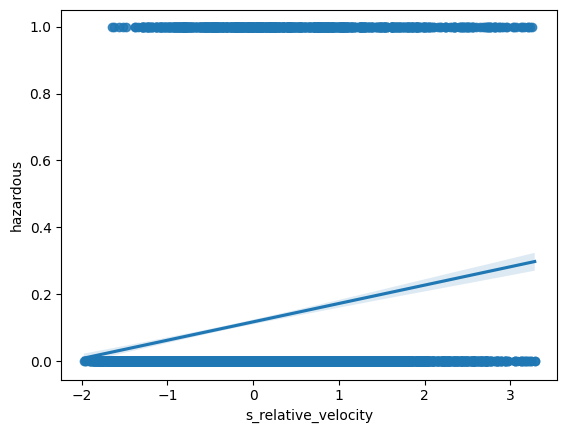

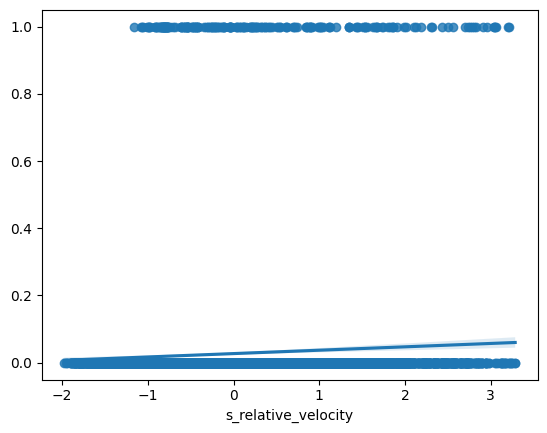

In [46]:
# draw regplot
sns.regplot(x = s_x_test['s_relative_velocity'],
            y=y_test,
            dropna = True)
# show the plot
plt.show()
sns.regplot(x = s_x_test['s_relative_velocity'],
            y=XGBC_pred,
            dropna = True)
# show the plot
plt.show()


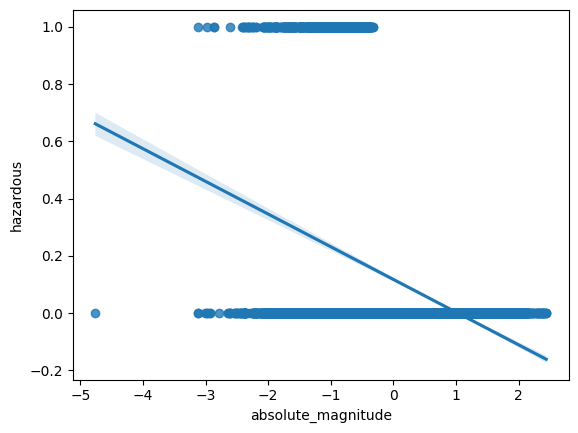

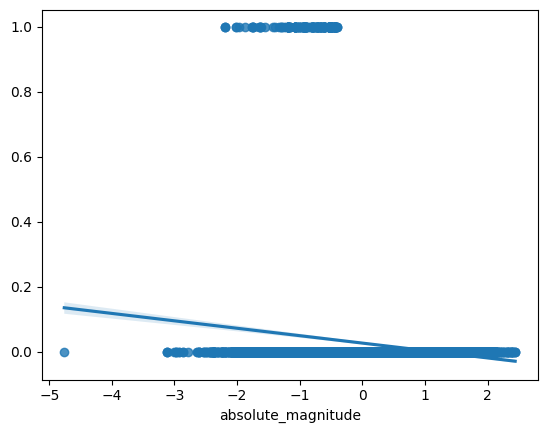

In [47]:
# draw regplot
sns.regplot(x = s_x_test['absolute_magnitude'],
            y=y_test,
            dropna = True)
# show the plot
plt.show()
sns.regplot(x = s_x_test['absolute_magnitude'],
            y=XGBC_pred,
            dropna = True)
# show the plot
plt.show()


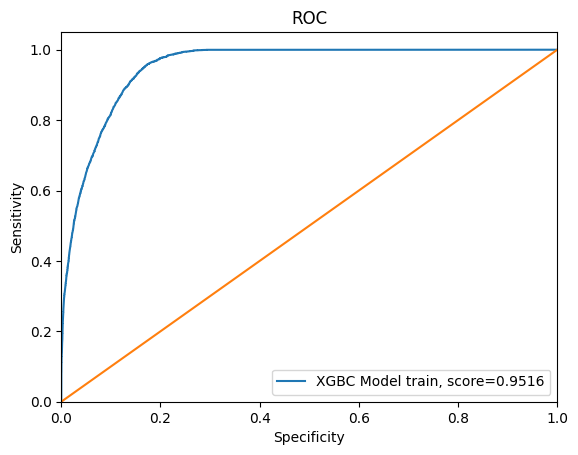

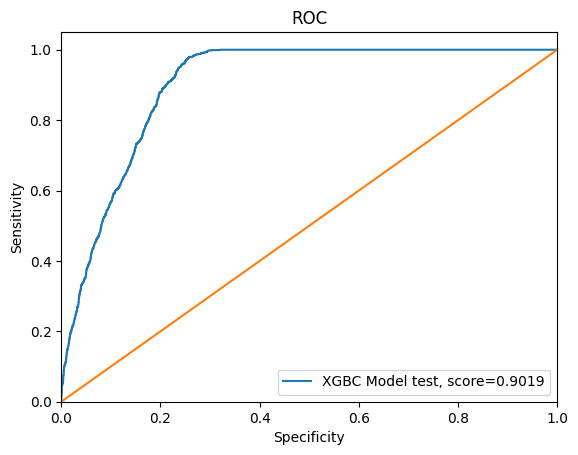

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score


# Model_roc_auc = roc_auc_score(y_test, y_pred)
# fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(s_x_test)[:,1])

Ypred_train = XGBC.predict_proba(s_x_train)[:,1]
fpr_train, tpr_train, threshold_train = roc_curve(y_train,  Ypred_train)

#plt.figure()
plt.plot(fpr_train,tpr_train,label="XGBC Model train, score="+str(round(roc_auc_score(y_train, Ypred_train), 4)))
plt.plot([0, 1], [0, 1])
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Ypred_test = XGBC.predict_proba(s_x_test)[:,1]
fpr_test, tpr_test, threshold_test = roc_curve(y_test,  Ypred_test)

#plt.figure()
plt.plot(fpr_test,tpr_test,label="XGBC Model test, score="+str(round(roc_auc_score(y_test, Ypred_test), 4)))
plt.plot([0, 1], [0, 1])
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()
